In [92]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from scipy.interpolate import griddata


In [93]:
picture = cv2.imread('../snapshots/frame-324.jpg')

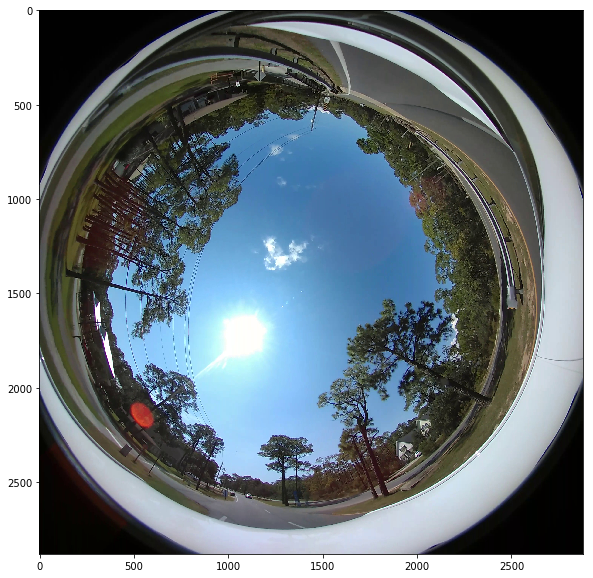

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.cvtColor(picture, cv2.COLOR_BGR2RGB))
#print(picture.shape)
plt.show()
#picture

In [95]:
#CV2 version


def camera(picture, outputshape=(300, 300), theta=65, phi=-100, windowsize=(35, 35), get_loc=True):
    imgsize=picture.shape[0]
    orix, oriy = picture.shape[0]/2, picture.shape[1]/2
    
    map1 = []
    map2 = []
    
    #print(orix)
    
    # Mapping construction DESTINATION
    for x in range(outputshape[0]):
        for y in range(outputshape[1]):
            map2.append([x,y])
    #print(np.array(map2).shape)
    
    for p in np.linspace(phi-windowsize[1]/2, phi+windowsize[1]/2, outputshape[1]):
        for r in np.linspace(theta-windowsize[0]/2, theta+windowsize[0]/2, outputshape[0]):
            p1 = orix + (r/90*orix) * np.cos(p/180*np.pi)
            p2 = oriy + (r/90*orix) * np.sin(p/180*np.pi)
            map1.append([int(p1), int(p2)])

    if get_loc:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(cv2.cvtColor(picture, cv2.COLOR_BGR2RGB))
        pnts = np.array(map1)
        ax.scatter(pnts[:,0], pnts[:,1], c='g', alpha=.010)
        ax.scatter(orix, oriy, c='r')
        plt.show()    

        
    grid_x, grid_y = np.mgrid[0:outputshape[0]:outputshape[0]*1j, 0:outputshape[1]:outputshape[0]*1j]
    grid_z = griddata(map2, map1, (grid_x, grid_y), method='cubic')
    map_x = np.append([], [ar[:,0] for ar in grid_z]).reshape(outputshape)
    map_y = np.append([], [ar[:,1] for ar in grid_z]).reshape(outputshape)
    map_x_32 = map_x.astype('float32')
    map_y_32 = map_y.astype('float32')
    
    trf = cv2.remap(picture,
                     map_x_32, map_y_32, 
                     cv2.INTER_LINEAR,)
    
    rows,cols = trf.shape[:2]

    M = cv2.getRotationMatrix2D((cols/2,rows/2),-90,1)
    dst = cv2.warpAffine(trf,M,(cols,rows))
    return dst
    



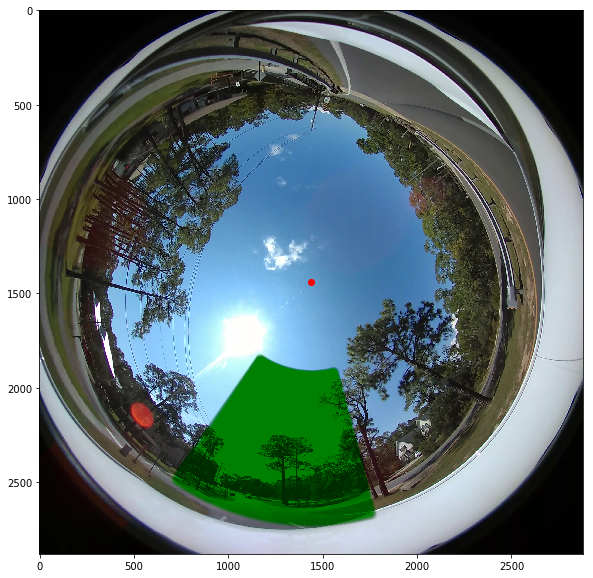

CPU times: user 4.89 s, sys: 60.5 ms, total: 4.95 s
Wall time: 2.72 s


In [105]:
%%time
extracted = camera(picture, get_loc=True, outputshape=(300, 300), windowsize=(50, 50), theta=55, phi=100)


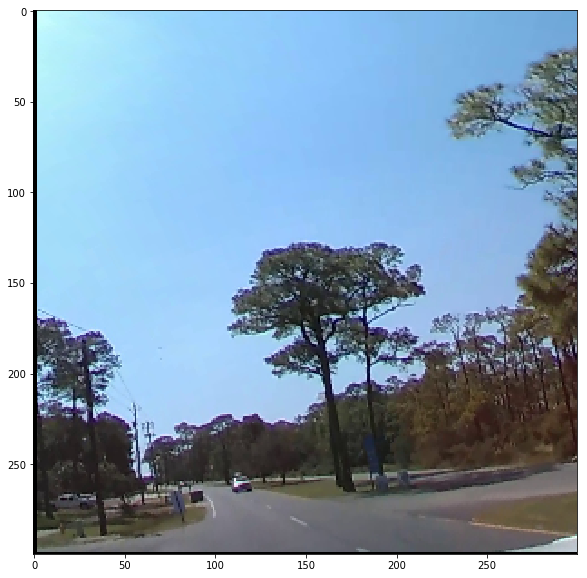

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.cvtColor(picture, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(extracted, cv2.COLOR_BGR2RGB))
plt.show()

In [70]:
np.mgrid[-1:1:10j]

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])